# Markov Chains 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

💫 Imagine that your cat and yourself have a superpower: the power of teleportation 💫

🐱 Your cat Emily is quite young and is discovering her superpower. 

She can use it only in three cities:
- 🇫🇷 Paris
- 🇬🇧 London
- 🇩🇪 Berlin

And she can teleport herself from one city to the other only once per day!

😱 Since you've been focusing on the Data Science challenges, you've just realised that you don't know where she's gone.

👉 However, based on some intuition, you "know" that:
- from Paris, she will:
    - stay in Paris tomorrow with probability 1/3
    - move to London with probability 1/3
    - move to Berlin with probability 1/3

- from London, she will:
    - move to Paris with probability 35%
    - stay in London with probability 35%
    - move to Berlin with probability 30%

- from Berlin, she will:
    - move to Paris with probability 15%
    - move to London with probability 20%
    - stay in Berlin tomorrow with probability 65%


## 🐱 1) Modelling the cat's movement

### 1.1) Draft

The definition of a Markov Chain is in this link https://www.bibmath.net/dico/index.php?action=affiche&quoi=./m/markov.html

✍️ Take a pen and a piece of paper to visualise Emily's moves.

<details>
   <summary>👀 Visual representation of this Markov Chain ( do it yourself first !)</summary>


</details>

### ✈️ 1.2) Transitions

We'll create for you the [`transition_matrix`](https://en.wikipedia.org/wiki/Stochastic_matrix) Q that represents these moves between `["paris", "london", "berlin"]`


If the probability of moving from `i` to `j` in one time step is $P(j|i) = P_{i,j}$, the transition matrix `Q` is given by using $P_{i,j}$ as the i-th row and j-th column element, e.g.,

$${\begin{bmatrix}P_{1,1}&P_{1,2}&\dots &P_{1,j}&\dots &P_{1,S}\\P_{2,1}&P_{2,2}&\dots &P_{2,j}&\dots &P_{2,S}\\\vdots &\vdots &\ddots &\vdots &\ddots &\vdots \\P_{i,1}&P_{i,2}&\dots &P_{i,j}&\dots &P_{i,S}\\\vdots &\vdots &\ddots &\vdots &\ddots &\vdots \\P_{S,1}&P_{S,2}&\dots &P_{S,j}&\dots &P_{S,S}\\\end{bmatrix}}$$

So for Emily, the transition matrix will be :

$${\begin{bmatrix}
P_{Paris \rightarrow Paris}&P_{Paris \rightarrow London} &P_{Paris \rightarrow Berlin}\\
P_{London \rightarrow Paris}&P_{London \rightarrow London}&P_{London \rightarrow Berlin}\\
P_{Berlin \rightarrow Paris}&P_{Berlin \rightarrow London}&P_{Berlin \rightarrow Berlin}\\
\end{bmatrix}}$$

In [2]:
CITIES = ["Paris", "London", "Berlin"]

In [3]:
map_cities_with_proba = lambda probas: list(zip(CITIES, np.squeeze(probas)))

In [4]:
Q = np.array([[1/3, 1/3, 1/3],
              [35/100, 35/100, 30/100],
              [15/100, 20/100, 65/100]])
Q

array([[0.33333333, 0.33333333, 0.33333333],
       [0.35      , 0.35      , 0.3       ],
       [0.15      , 0.2       , 0.65      ]])

Also called **`stochastic matrixes`**, these matrixes have a remarkable property: Each line is a **`probability vector`**, its coefficients sum up to 1 = 100%

In [5]:
# valid the Q matrix
# if our matrix is valid we are supposed to get sum equal to 1 per rows
np.sum(Q, axis=1)

array([1., 1., 1.])

👉 Let's imagine Emily started in Paris **initially**  
We'll create an initial_position array (1 row  ×  3 columns) storing those information

In [6]:
initial_position = np.array([[1, 0, 0]])
initial_position

array([[1, 0, 0]])

❓ What the probability for Emily to be in paris/london/berlin in next step? Try to compute it, using dot products between
- some slices of `Q`
- and `initial_position`

In [7]:
x1 = initial_position.dot(Q)

Emily's deplacement probabilities after a turn are as follows (cell bellow):

In [8]:
map_cities_with_proba(x1)

[('Paris', 0.3333333333333333),
 ('London', 0.3333333333333333),
 ('Berlin', 0.3333333333333333)]

ℹ️ Now, let's assume you don't know where your cat was last seen, but you have some initial guess: She's **initially**:
- in Paris with a probability equal to 30%
- in London with a probability equal to 40%
- in Berlin with a probability equal to 30%

❓ Create your (1,3) array of `initial_position`  

In [9]:
initial_position = np.array([[30/100, 40/100, 30/100]])

❓ Compute the $ (1,3) $ array of probabilities `day_1` of the cat being in each city on ***day 1*** with an elegant math formula ❓



To compute the probability of day x we just need to raise the probability matrix to the desired number of days and proceed to a matrix product :

$position \cdot P^{n}$

In [10]:
day_1 = initial_position.dot(np.linalg.matrix_power(Q, 1))
map_cities_with_proba(day_1)

[('Paris', 0.285), ('London', 0.3), ('Berlin', 0.415)]

❓ What is the probability that Emily will be in Paris on day 2 ? What about London and Berlin ❓

In [11]:
day_2 =  initial_position.dot(np.linalg.matrix_power(Q, 2))
map_cities_with_proba(day_2)

[('Paris', 0.26225), ('London', 0.283), ('Berlin', 0.45475)]

### ⏳ 1.3) Where is the cat *n* days later ? 

❓ Create a function `emily` which computes the probabilities of Emily being in Paris, Berlin and London after `n_days`❓

* `Inputs` : `initial_position`, `transition_matrix` and `n_days`
* `Output` : probabilities of each city

In [12]:
def emily(initial_position, transition_matrix, n):
  assert initial_position.shape[1] == transition_matrix.shape[0]
  return initial_position.dot(np.linalg.matrix_power(transition_matrix, n))

In [13]:
# Verify function with 2 days
(emily(initial_position=initial_position, transition_matrix=Q, n=2) == day_2).any()

True

❓ So, where will Emily be in 100 days ❓

In [14]:
p_100_days = emily(initial_position=initial_position, transition_matrix=Q, n=100)
map_cities_with_proba(p_100_days)

[('Paris', 0.2509363295880146),
 ('London', 0.27465667915106073),
 ('Berlin', 0.4744069912609231)]

### 📈 1.4) Visualising the probabilities overtime

❓ Plot the probabilities of being in each city over time

😉 This last question is non-guided !

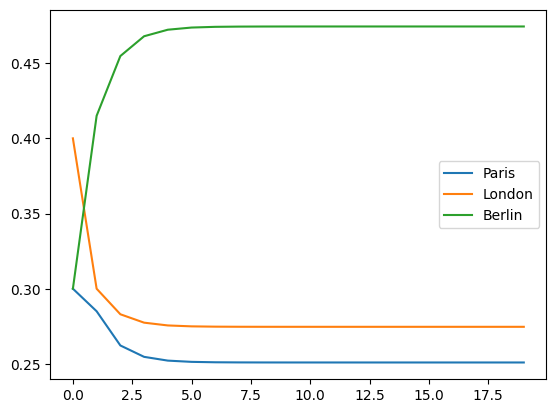

In [15]:
def emily_over_time(initial_position, transition_matrix, n_days):
  positions = np.empty((n_days, 3))

  for i in range(n_days):
    # Computing the probabilities each day
    positions[i] = emily(initial_position, transition_matrix, i)

  # Visualing
  plt.figure()
  plt.plot(positions[:, 0], label="Paris") 
  plt.plot(positions[:, 1], label="London") 
  plt.plot(positions[:, 2], label="Berlin") 
  plt.legend()

emily_over_time(initial_position, Q, 20)

## 🥡 2) Takeaways

❤️ After `Emily in Paris`, we'll most likely have `Emily in Berlin` in the long run ! => AHAHAHAH

❗️ ***Not all the Markov Chains converge to a stable state ❗️*** Think about a hamster who lives between two states 0 and 1 and moves from one to the other with probability 1 each day ! 

💡 Did you know? 
- Google computes the probability that from one page, you click on other pages ! 
- Its secret algorithm is based on Markov Chains (and of course advanced refinements which made the founders billionaires...!)
- 📚 `Google Search Engine` : [Analytics Vidhya article - Google Page Rank and Markov Chains](https://medium.com/analytics-vidhya/google-page-rank-and-markov-chains-d65717b98f9c)


🏁 Congratulations !

💾 Do not forget to `save`your notebook

😁 No panic if Markov Chains are still not clear for you. This challenge was more like an introduction to this topic, however for Data Analyst and Junior Data Scientists or Dev IA , you won't need necessarily use it :) 

🥳 Consider that it was a good opportunity to manipulate tools from `Linear Algebra` such as `matrixes` and tools from `Probabilty Theory` such as `probability distributions` !